# Projeto 1 - Análise Exploratória

## Beatriz Galassi Alexandre

#### Indicadores: 
- IDH
- Assasinatos
- Área Florestal

## Introdução
Atualmente,os países mais desenvolvidos possuem um alto grau de industrialização e alto IDH (Índce de Desenvolvimento Humano) e minha hipótese é que estes países possuem uma área floresta pequena, com isso irei investigar a relação entre IDH e Área Florestal, e responder a seguinte pergunta: Isso me leva a primeira pergunta que é um país precisa ter uma menor área florestal e maior industrializada para ter alto IDH?

Outra relação a qual irei investigar é entre o IDH e os assasinatos, pois me surgiu a curiosidade de saber se há relação entre estas variáveis. A partir disso, elaborei a seguinte pergnta: O IDH será sempre baixo caso o número de assasinatos sejam altos?


#### Perguntas:
- #### Um país precisa ter uma menor área florestal para ter alto IDH?
* ####  O IDH será sempre baixo caso o número de assasinatos sejam altos?

## Importando as bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Apresentando os dados de um DataFrama

- Dados IDH (Índice de Desenvolvimento Humano)

In [2]:
dados_IDH = pd.read_excel('hdi_human_development_index.xlsx')
IDH_2004 = dados_IDH.loc[:,["geo", 2004]]
IDH_2004.head()

,geo,2004
0,Afghanistan,0.396
1,Albania,0.685
2,Algeria,0.680
3,Andorra,NaN
4,Angola,0.426


- Dados Assasinatos (total de mortes)

In [3]:
dados_assasinatos = pd.read_excel('murder_total_deaths.xlsx')
assasinatos_2004 = dados_assasinatos.loc[:,["geo", 2004]]
assasinatos_2004.head()

,geo,2004
0,Afghanistan,813
1,Albania,208
2,Algeria,3100
3,Andorra,1
4,Angola,6230


- Dados Área Florestal (km²)

In [4]:
dados_area_florestal = pd.read_excel('forest_area_sq_km.xlsx')
area_florestal_2004 = dados_area_florestal.loc[:,["geo", 2004]]
area_florestal_2004.head()

,geo,2004
0,Afghanistan,13500.0
1,Albania,7800.0
2,Algeria,15400.0
3,Andorra,160.0
4,Angola,592000.0


## Mudando os índices

A mudança de índice foi realizada para que a primeira coluna do DataFrame fosse os países

In [5]:
IDH_idx = IDH_2004.set_index('geo')
IDH_idx.head(10)

,2004
geo,
Afghanistan,0.396
Albania,0.685
Algeria,0.680
Andorra,NaN
Angola,0.426
Antigua and Barbuda,NaN
Argentina,0.780
Armenia,0.679
Australia,0.910


In [6]:
assasinatos_idx = assasinatos_2004.set_index('geo').add_suffix('_Assasinatos')
assasinatos_idx.head()

,2004_Assasinatos
geo,
Afghanistan,813
Albania,208
Algeria,3100
Andorra,1
Angola,6230


In [7]:
area_florestal_idx = area_florestal_2004.set_index('geo')
area_florestal_idx.head(10)

,2004
geo,
Afghanistan,13500.0
Albania,7800.0
Algeria,15400.0
Andorra,160.0
Angola,592000.0
Antigua and Barbuda,98.4
Argentina,305000.0
Armenia,3320.0
Australia,1280000.0


## Juntando os dados em um único DataFrame

In [8]:
dados=IDH_idx.join(area_florestal_idx, how='inner', lsuffix='_IDH', rsuffix='_Area_f(km²)')

In [9]:
dados.head()

,2004_IDH,2004_Area_f(km²)
geo,,
Afghanistan,0.396,13500.0
Albania,0.685,7800.0
Algeria,0.680,15400.0
Andorra,NaN,160.0
Angola,0.426,592000.0


In [10]:
dados1=dados.join(assasinatos_idx, how='inner', lsuffix='_IDH', rsuffix='_Assasinatos')

##### DataFrame com todas as variáveis

In [11]:
data = dados1.dropna()
data.head()

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
geo,,,
Afghanistan,0.396,13500.0,813
Albania,0.685,7800.0,208
Algeria,0.680,15400.0,3100
Angola,0.426,592000.0,6230
Argentina,0.780,305000.0,2600


## Salvando em um arquivo CSV

In [12]:
data.to_csv("Projeto1.csv")

## Salvando em um arquivo XLSX

In [13]:
data.to_excel('Projeto1.xlsx',index=True)

## Gráficos

Definindo função que plota reta por dispersão

In [14]:
def reta(dados_x, dados_y, ano, eixox, eixoy):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',eixox,'  e ',eixoy,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(ano)
    plt.xlabel(eixox)
    plt.ylabel(eixoy)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

###### Gráfico Área Florestal por IDH

* Gráfico com linha de tendência

Ajuste linear entre  IDH   e  Área Florestal(km²) :
Coeficiente linear: -25045.40564981103
Coeficiente angular: 406726.00852894026


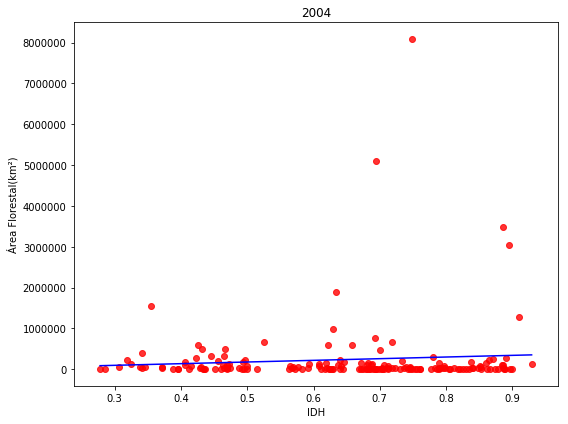

In [15]:
reta(data["2004_IDH"], data["2004_Area_f(km²)"], '2004', 'IDH', 'Área Florestal(km²)')

Este gráfico mostra que há uma linha de tendência na relação entre o IDH e a Área Florestal, e ao observar o gráfico percebe-se que a linha é levemente inclinada para cima

* Gráfico Scatter

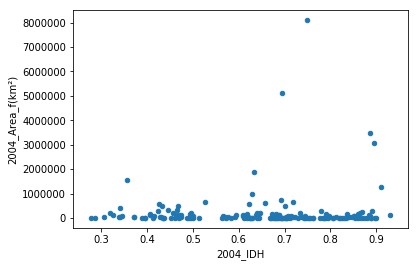

In [16]:
data.plot.scatter(x="2004_IDH", y ='2004_Area_f(km²)')

* Gráfico Scatter com vista aproximada para uma determinada área (0 km² - 80.000 km²)

(0, 80000)

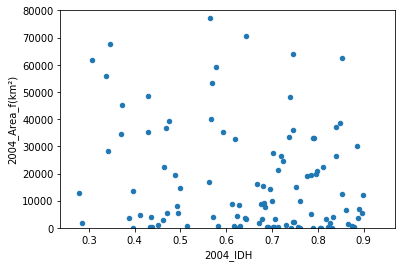

In [17]:
plotando = data.plot.scatter(x ='2004_IDH', y = '2004_Area_f(km²)')
plt.ylim((0,80000))

* DataFrame que mostra os países com Área Florestal menor que 1000 km² e IDH maior que 0.7.

In [18]:
data[(data['2004_Area_f(km²)'] <= 1000) & (data['2004_IDH'] >= 0.7)]

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
geo,,,
Bahrain,0.806,4.3,8
Barbados,0.761,63.0,44
Dominica,0.703,463.0,7
Iceland,0.879,350.0,3
Jordan,0.730,975.0,369
Kuwait,0.789,54.1,36
Luxembourg,0.874,867.0,5
Malta,0.805,3.5,3
Mauritius,0.704,389.0,33


A partir do Gráfico Scatter sem nehnuma área determinada é possível notar que maioria dos países possuem uma ampla área florestal e alto IDH. Ao determinar uma área e plotar outro gráfico Scatter fica claro que área florestal não é ampla e o IDH alto, ou seja, esses países possuem uma área florestal pequena e IDH elevado. Exemplo desses países são: Qatae, Islândia, Luxemburgo, Malta, etc.

* Gráfico Scatter com vista aproximada para uma determinada área (500.000km² - 800.000 km²)

(500000, 800000)

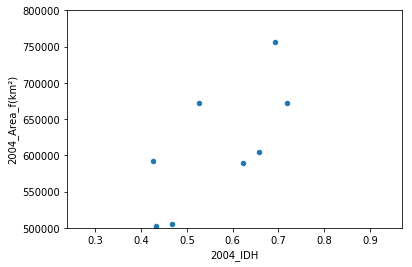

In [19]:
plotando = data.plot.scatter(x ='2004_IDH', y = '2004_Area_f(km²)')
plt.ylim((500000,800000))

* DataFrame que mostra os países com Área Florestal maior que 750000 km² e IDH maior que 0.7.

In [28]:
data[(data['2004_Area_f(km²)'] >= 750000) & (data['2004_IDH'] >= 0.7)]

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
geo,,,
Australia,0.910,1280000.0,253
Canada,0.886,3480000.0,446
Russia,0.748,8090000.0,42900
United States,0.895,3050000.0,17700


Ao contrário do que foi possível notar no Scatter e DataFrame anteriores, nestes é evidente que exitem países com área florestal grande e mesmo assim IDH elevado, maiores que 0.7. A Austrália deixa essa fato claro, seu IDH é 0.910 e sua área florestal é de 1.280.000 km², outro país que nos mostra melhor ainda a relação acima é o Canadá, seu IDH é 0.886 e sua área florestal é 3.480.000 km².

###### Gráfico Assasinatos por IDH

* Gráfico com linha de tendência

Ajuste linear entre  IDH   e  Assasinatos :
Coeficiente linear: 8305.785124647315
Coeficiente angular: -7429.604337820575


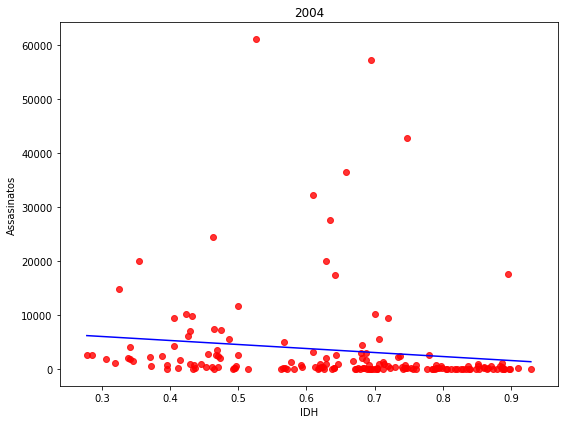

In [21]:
reta(data["2004_IDH"], data["2004_Assasinatos"], '2004', 'IDH', 'Assasinatos')

O gráfio com a reta de tendência mostra que a tendência é ter maior IDH e menor total de assasinatos de pessoas.

* Gráfico Scatter

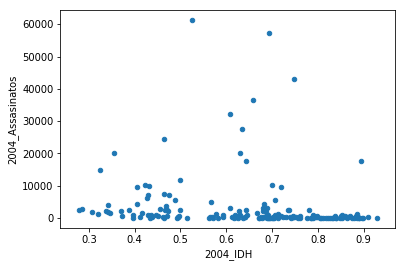

In [22]:
plot=data.plot.scatter(x= '2004_IDH', y ='2004_Assasinatos')

* Gráfico Scatter com total de assasinatos de pessoas determinado (0 - 1000)

(0, 1000)

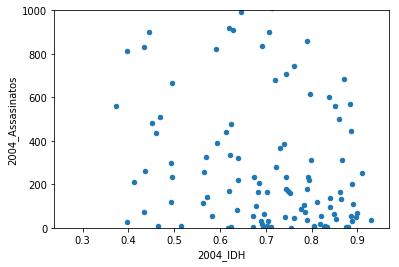

In [23]:
plotando = data.plot.scatter(x= '2004_IDH', y ='2004_Assasinatos')
plt.ylim((0,1000))

* DataFrame que mostra os países com um total de assasinatos menor que 100 pessoas e IDH maior que 0.8

In [24]:
data[(data['2004_Assasinatos'] <= 100) & (data['2004_IDH'] >= 0.8)]

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
geo,,,
Austria,0.848,38500.0,63
Bahrain,0.806,4.3,8
Brunei,0.834,3910.0,4
Cyprus,0.826,1730.0,2
Denmark,0.897,5630.0,52
Greece,0.839,37200.0,97
Iceland,0.879,350.0,3
Ireland,0.889,6830.0,30
Luxembourg,0.874,867.0,5


Pode-se analisar a partir do DataFrame e gráfico acima que exitem países que o seu total de assasinatos não passa de 100 pessoas e os mesmos possuem um IDH no mínimo 0.8. Alguns desses países são: Nova Zelândia, Irlanda, Islândia, Malta, Emirados Arábes, etc.

* Gráfico Scatter com total de assasinatos de pessoas no país determinado (1000 - 2000)

(1000, 2000)

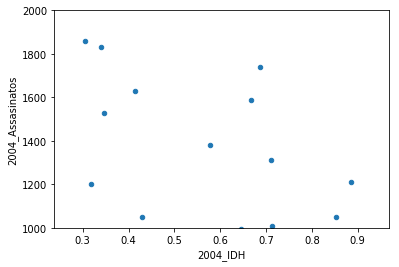

In [25]:
plotando = data.plot.scatter(x= '2004_IDH', y ='2004_Assasinatos')
plt.ylim((1000,2000))

* DataFrame que mostra os países com um total de assasinatos maior que 1000 pessoas e IDH maior que 0.8

In [31]:
data[(data['2004_Assasinatos'] >= 1000) & (data['2004_IDH'] >= 0.8)]

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
geo,,,
South Korea,0.852,62600.0,1050
United Kingdom,0.886,30100.0,1210
United States,0.895,3050000.0,17700


O DataFrame junto ao gráfico deixam evidente que países com um total de assasinatos elevado consegue mesmo assim ter um alto IDH, os países a seguir deixam isso evidente: Coréia do Sul, Reino Unido e Estados Unidos.

* DataFrame que mostra os países com um total de assasinatos maior que 1000 pessoas e IDH menor que 0.4.

In [36]:
data[(data['2004_Assasinatos'] >= 1000) & (data['2004_IDH'] <= 0.4)]

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
geo,,,
Burundi,0.286,1840.0,2680
Central African Republic,0.319,223000.0,1200
Chad,0.306,61800.0,1860
"Congo, Dem. Rep.",0.355,1560000.0,20100
Ethiopia,0.325,131000.0,14900
Guinea,0.346,67600.0,1530
Malawi,0.371,34400.0,2320
Mali,0.338,55800.0,2030
Mozambique,0.341,403000.0,4070


O DataFrame acima  nos mostra que há vários países que possuem IDH baixo, menores ou igual a 0.4, mas não é uma qunatidade absurda.

## Taxa de Correlação

In [30]:
data.corr()

,2004_IDH,2004_Area_f(km²),2004_Assasinatos
2004_IDH,1.000000,0.081707,-0.139659
2004_Area_f(km²),0.081707,1.000000,0.617811
2004_Assasinatos,-0.139659,0.617811,1.000000


## Retomando as perguntas:
- #### Um país precisa ter uma menor área florestal para ter alto IDH?
* ####  O IDH será sempre baixo caso o número de assasinatos sejam altos?

## Conclusão

Com a análise exploratória realizada pode-seresponder as perguntas. Para a primeira pergunta, pode-se dizer não necessariamente um país precisa de uma menor área florestal para ter alto IDH, como estes países, Austrália e Canadá, mostraram. Com isso, conclui-se que existe sim uma relação entre área florestal e IDH, esta vale para a maior parte dos países, que é quanto menor a área florestal, maior o IDH.



Para a segunda pergunta a resposta é não, como foi possível observar na análise. Esta pergunta leva as eguinte conclusão, que existem países com baixo IDH e alto índice de totsl de assasinatos de pessoas, mas não como o esperado, os países que apresentam essa característica são a minoria. Enquanto que países como Coréia do Sul, Reino Unido, Estados Unidos possuem IDH elevado e também elevado índice de total de assasinatos de pessoas.


## Bibliografia:

- Dados:
https://www.gapminder.org/data/
- Join:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
- DropNa:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
- Aula 1
- Aula 2
- Aula 3
- Tutorial
- Pesquisa:
https://www.infoescola.com/geografia/paises-desenvolvidos/